# Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 

![Equator](equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Coding Boot Camp (C) 2016. All Rights Reserved.


<h1> Observations </h1>
<ol>
    <li> Humidity in the cities is higher or increases as the Latitude is close to Zero degrees(Equator). </li>
    <li> Max. Temperature in the cities is higher or increases as the Latitude is close to Zero degrees(Equator). </li>
    <li> No obvious corelation between Cloudiness and Latitude. </li>
    <li> Wind Speed seems to increase as you move away from the Zero degrees Lattitude (Equator). </li>
</ol>        


In [1]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
from pprint import pprint
# Google developer API key
from config import owkey
from random import *
from math import *
from citipy import citipy
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from collections import Counter

In [2]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [3]:
# Define ranges for values for Lattitude and Longitude
minLat = -90
maxLat = 90
minLng = 0
maxLng = 180

cities = []
cityCountry = []
cityDict = {}
# pprint(len(cities))

# Loop until data is collected for 500 unique cities.
while len(cities) < 500:
#     print(f"\r Number of cities data collected: {len(cities)}", end=" ") 

    # Generate lattitle and longitude co-ordinates randomly
#     random_number = random()
#     lat = minLat + random() * ((maxLat - minLat))
#     lng = minLng + random() * ((maxLng - minLng))
    lat = randrange(-90,90)
    lng = randrange(-180,180)
    
    # Using the citipy library find the nearest city to the lat/lng combination.
    city = citipy.nearest_city(lat,lng)   

    # Check if the city is already in the collection, if not add else skip and try for another lat/lng.
    if city.city_name + city.country_code not in cityCountry and (len(cities) == 0 
                                                                  or Counter([city['country'] for city in cities]).most_common(1)[0][1] < 25
                                                                  or city.country_code != 'ru'):
        base_url = "https://api.openweathermap.org/data/2.5/weather?units=metric&q=%s&APPID=%s" % (city.city_name + ',' + city.country_code , owkey)
        # pprint(base_url)
        # Collect the weather data for the city and country using the open weather api.
        try:

            weather_data = requests.get(base_url).json()
            # Check if the weather data exists for that city/country, else try for another one.
            if (len(weather_data.get('base')) > 0 ):
                cityDict = {'citycountry': city.city_name + city.country_code,
                             'city' : city.city_name, 'country' : city.country_code,
                             'lat' : lat, 'lng': lng, 'cloudiness': weather_data.get('clouds').get('all'),
                             'humidity': weather_data.get('main').get('humidity'),
                             'wind speed': weather_data.get('wind').get('speed'),
                             'temp' : weather_data.get('main').get('temp_max'),
                             'base_url' : base_url}
                cities.append(cityDict)
                cityCountry.append(city.city_name + city.country_code)
                print(f"Processing record {len(cities)} of 500 | {city.city_name}, {city.country_code}")
                print(f"{base_url}")  
#                 print(f"{Counter([city['country'] for city in cities]).most_common(3)}")
                
        except:
            continue
#             pprint(city.city_name + city.country_code)
#             pprint(weather_data)
#         print(f"Running while loop: city: {city.city_name} country:{city.country_code} {Counter([city['country'] for city in cities]).most_common(5)}")
cities_df = pd.DataFrame(cities)

# cities_df.head()

Processing record 1 of 500 | cabo san lucas, mx
https://api.openweathermap.org/data/2.5/weather?units=metric&q=cabo san lucas,mx&APPID=658432372d775e19d42e7c70280b22af
Processing record 2 of 500 | hofn, is
https://api.openweathermap.org/data/2.5/weather?units=metric&q=hofn,is&APPID=658432372d775e19d42e7c70280b22af
Processing record 3 of 500 | itoman, jp
https://api.openweathermap.org/data/2.5/weather?units=metric&q=itoman,jp&APPID=658432372d775e19d42e7c70280b22af
Processing record 4 of 500 | kapaa, us
https://api.openweathermap.org/data/2.5/weather?units=metric&q=kapaa,us&APPID=658432372d775e19d42e7c70280b22af
Processing record 5 of 500 | arraial do cabo, br
https://api.openweathermap.org/data/2.5/weather?units=metric&q=arraial do cabo,br&APPID=658432372d775e19d42e7c70280b22af
Processing record 6 of 500 | tuktoyaktuk, ca
https://api.openweathermap.org/data/2.5/weather?units=metric&q=tuktoyaktuk,ca&APPID=658432372d775e19d42e7c70280b22af
Processing record 7 of 500 | chuy, uy
https://api.

Processing record 54 of 500 | labytnangi, ru
https://api.openweathermap.org/data/2.5/weather?units=metric&q=labytnangi,ru&APPID=658432372d775e19d42e7c70280b22af
Processing record 55 of 500 | khonsa, in
https://api.openweathermap.org/data/2.5/weather?units=metric&q=khonsa,in&APPID=658432372d775e19d42e7c70280b22af
Processing record 56 of 500 | port hardy, ca
https://api.openweathermap.org/data/2.5/weather?units=metric&q=port hardy,ca&APPID=658432372d775e19d42e7c70280b22af
Processing record 57 of 500 | anchorage, us
https://api.openweathermap.org/data/2.5/weather?units=metric&q=anchorage,us&APPID=658432372d775e19d42e7c70280b22af
Processing record 58 of 500 | dolores, ar
https://api.openweathermap.org/data/2.5/weather?units=metric&q=dolores,ar&APPID=658432372d775e19d42e7c70280b22af
Processing record 59 of 500 | saint-joseph, re
https://api.openweathermap.org/data/2.5/weather?units=metric&q=saint-joseph,re&APPID=658432372d775e19d42e7c70280b22af
Processing record 60 of 500 | qaanaaq, gl
http

Processing record 107 of 500 | barrow, us
https://api.openweathermap.org/data/2.5/weather?units=metric&q=barrow,us&APPID=658432372d775e19d42e7c70280b22af
Processing record 108 of 500 | puerto ayora, ec
https://api.openweathermap.org/data/2.5/weather?units=metric&q=puerto ayora,ec&APPID=658432372d775e19d42e7c70280b22af
Processing record 109 of 500 | fuling, cn
https://api.openweathermap.org/data/2.5/weather?units=metric&q=fuling,cn&APPID=658432372d775e19d42e7c70280b22af
Processing record 110 of 500 | papetoai, pf
https://api.openweathermap.org/data/2.5/weather?units=metric&q=papetoai,pf&APPID=658432372d775e19d42e7c70280b22af
Processing record 111 of 500 | petropavlovsk-kamchatskiy, ru
https://api.openweathermap.org/data/2.5/weather?units=metric&q=petropavlovsk-kamchatskiy,ru&APPID=658432372d775e19d42e7c70280b22af
Processing record 112 of 500 | ilulissat, gl
https://api.openweathermap.org/data/2.5/weather?units=metric&q=ilulissat,gl&APPID=658432372d775e19d42e7c70280b22af
Processing recor

Processing record 159 of 500 | palmer, us
https://api.openweathermap.org/data/2.5/weather?units=metric&q=palmer,us&APPID=658432372d775e19d42e7c70280b22af
Processing record 160 of 500 | nortelandia, br
https://api.openweathermap.org/data/2.5/weather?units=metric&q=nortelandia,br&APPID=658432372d775e19d42e7c70280b22af
Processing record 161 of 500 | kodinsk, ru
https://api.openweathermap.org/data/2.5/weather?units=metric&q=kodinsk,ru&APPID=658432372d775e19d42e7c70280b22af
Processing record 162 of 500 | souillac, mu
https://api.openweathermap.org/data/2.5/weather?units=metric&q=souillac,mu&APPID=658432372d775e19d42e7c70280b22af
Processing record 163 of 500 | hasaki, jp
https://api.openweathermap.org/data/2.5/weather?units=metric&q=hasaki,jp&APPID=658432372d775e19d42e7c70280b22af
Processing record 164 of 500 | mercedes, uy
https://api.openweathermap.org/data/2.5/weather?units=metric&q=mercedes,uy&APPID=658432372d775e19d42e7c70280b22af
Processing record 165 of 500 | veinticinco de mayo, ar
h

Processing record 211 of 500 | north myrtle beach, us
https://api.openweathermap.org/data/2.5/weather?units=metric&q=north myrtle beach,us&APPID=658432372d775e19d42e7c70280b22af
Processing record 212 of 500 | cabrero, cl
https://api.openweathermap.org/data/2.5/weather?units=metric&q=cabrero,cl&APPID=658432372d775e19d42e7c70280b22af
Processing record 213 of 500 | gouyave, gd
https://api.openweathermap.org/data/2.5/weather?units=metric&q=gouyave,gd&APPID=658432372d775e19d42e7c70280b22af
Processing record 214 of 500 | visnes, no
https://api.openweathermap.org/data/2.5/weather?units=metric&q=visnes,no&APPID=658432372d775e19d42e7c70280b22af
Processing record 215 of 500 | tasiilaq, gl
https://api.openweathermap.org/data/2.5/weather?units=metric&q=tasiilaq,gl&APPID=658432372d775e19d42e7c70280b22af
Processing record 216 of 500 | longyearbyen, sj
https://api.openweathermap.org/data/2.5/weather?units=metric&q=longyearbyen,sj&APPID=658432372d775e19d42e7c70280b22af
Processing record 217 of 500 | m

Processing record 263 of 500 | shimoda, jp
https://api.openweathermap.org/data/2.5/weather?units=metric&q=shimoda,jp&APPID=658432372d775e19d42e7c70280b22af
Processing record 264 of 500 | male, mv
https://api.openweathermap.org/data/2.5/weather?units=metric&q=male,mv&APPID=658432372d775e19d42e7c70280b22af
Processing record 265 of 500 | gamba, ga
https://api.openweathermap.org/data/2.5/weather?units=metric&q=gamba,ga&APPID=658432372d775e19d42e7c70280b22af
Processing record 266 of 500 | thinadhoo, mv
https://api.openweathermap.org/data/2.5/weather?units=metric&q=thinadhoo,mv&APPID=658432372d775e19d42e7c70280b22af
Processing record 267 of 500 | cabanas, cu
https://api.openweathermap.org/data/2.5/weather?units=metric&q=cabanas,cu&APPID=658432372d775e19d42e7c70280b22af
Processing record 268 of 500 | port blair, in
https://api.openweathermap.org/data/2.5/weather?units=metric&q=port blair,in&APPID=658432372d775e19d42e7c70280b22af
Processing record 269 of 500 | awjilah, ly
https://api.openweath

Processing record 316 of 500 | nakhon thai, th
https://api.openweathermap.org/data/2.5/weather?units=metric&q=nakhon thai,th&APPID=658432372d775e19d42e7c70280b22af
Processing record 317 of 500 | buncrana, ie
https://api.openweathermap.org/data/2.5/weather?units=metric&q=buncrana,ie&APPID=658432372d775e19d42e7c70280b22af
Processing record 318 of 500 | ajaccio, fr
https://api.openweathermap.org/data/2.5/weather?units=metric&q=ajaccio,fr&APPID=658432372d775e19d42e7c70280b22af
Processing record 319 of 500 | nong phai, th
https://api.openweathermap.org/data/2.5/weather?units=metric&q=nong phai,th&APPID=658432372d775e19d42e7c70280b22af
Processing record 320 of 500 | ponta delgada, pt
https://api.openweathermap.org/data/2.5/weather?units=metric&q=ponta delgada,pt&APPID=658432372d775e19d42e7c70280b22af
Processing record 321 of 500 | cayenne, gf
https://api.openweathermap.org/data/2.5/weather?units=metric&q=cayenne,gf&APPID=658432372d775e19d42e7c70280b22af
Processing record 322 of 500 | barvink

Processing record 368 of 500 | coruripe, br
https://api.openweathermap.org/data/2.5/weather?units=metric&q=coruripe,br&APPID=658432372d775e19d42e7c70280b22af
Processing record 369 of 500 | vestmanna, fo
https://api.openweathermap.org/data/2.5/weather?units=metric&q=vestmanna,fo&APPID=658432372d775e19d42e7c70280b22af
Processing record 370 of 500 | houma, us
https://api.openweathermap.org/data/2.5/weather?units=metric&q=houma,us&APPID=658432372d775e19d42e7c70280b22af
Processing record 371 of 500 | mandalgovi, mn
https://api.openweathermap.org/data/2.5/weather?units=metric&q=mandalgovi,mn&APPID=658432372d775e19d42e7c70280b22af
Processing record 372 of 500 | paciran, id
https://api.openweathermap.org/data/2.5/weather?units=metric&q=paciran,id&APPID=658432372d775e19d42e7c70280b22af
Processing record 373 of 500 | san borja, bo
https://api.openweathermap.org/data/2.5/weather?units=metric&q=san borja,bo&APPID=658432372d775e19d42e7c70280b22af
Processing record 374 of 500 | hervey bay, au
https:

Processing record 421 of 500 | daru, pg
https://api.openweathermap.org/data/2.5/weather?units=metric&q=daru,pg&APPID=658432372d775e19d42e7c70280b22af
Processing record 422 of 500 | waddan, ly
https://api.openweathermap.org/data/2.5/weather?units=metric&q=waddan,ly&APPID=658432372d775e19d42e7c70280b22af
Processing record 423 of 500 | mulege, mx
https://api.openweathermap.org/data/2.5/weather?units=metric&q=mulege,mx&APPID=658432372d775e19d42e7c70280b22af
Processing record 424 of 500 | mantua, cu
https://api.openweathermap.org/data/2.5/weather?units=metric&q=mantua,cu&APPID=658432372d775e19d42e7c70280b22af
Processing record 425 of 500 | linxia, cn
https://api.openweathermap.org/data/2.5/weather?units=metric&q=linxia,cn&APPID=658432372d775e19d42e7c70280b22af
Processing record 426 of 500 | ciudad bolivar, ve
https://api.openweathermap.org/data/2.5/weather?units=metric&q=ciudad bolivar,ve&APPID=658432372d775e19d42e7c70280b22af
Processing record 427 of 500 | fengrun, cn
https://api.openweath

Processing record 473 of 500 | kupang, id
https://api.openweathermap.org/data/2.5/weather?units=metric&q=kupang,id&APPID=658432372d775e19d42e7c70280b22af
Processing record 474 of 500 | tual, id
https://api.openweathermap.org/data/2.5/weather?units=metric&q=tual,id&APPID=658432372d775e19d42e7c70280b22af
Processing record 475 of 500 | mecca, sa
https://api.openweathermap.org/data/2.5/weather?units=metric&q=mecca,sa&APPID=658432372d775e19d42e7c70280b22af
Processing record 476 of 500 | debre tabor, et
https://api.openweathermap.org/data/2.5/weather?units=metric&q=debre tabor,et&APPID=658432372d775e19d42e7c70280b22af
Processing record 477 of 500 | gimli, ca
https://api.openweathermap.org/data/2.5/weather?units=metric&q=gimli,ca&APPID=658432372d775e19d42e7c70280b22af
Processing record 478 of 500 | jalu, ly
https://api.openweathermap.org/data/2.5/weather?units=metric&q=jalu,ly&APPID=658432372d775e19d42e7c70280b22af
Processing record 479 of 500 | golub-dobrzyn, pl
https://api.openweathermap.or

In [4]:
# len([i for i in cities if cities['country'] == 'ru'])
# or max(Counter([city['country'] for city in cities]).values()) < 10)
# and (len(cities) == 0 or Counter([city['country'] for city in cities]).most_common(1)[0][1] < 25)
# from collections import Counter
# and (len(cities) == 0 or max(Counter([city['country'] for city in cities]).values()), len(cities)
# and (len(cities) == 0 or Counter([city['country'] for city in cities]).most_common(1)[0][1])

# pprint(len(Counter([city['country'] for city in cities]).keys()))
# Counter([city['country'] for city in cities])
# pprint(Counter.__doc__)

# Print to File
cities_df.to_csv("Output/WeatherPy.csv", index=False, header=True)

In [5]:
# lat = random() * pi * 2
# lng = acos(random() * 2 - 1)
# lat = randrange(-90,90)
# lng = randrange(0,180)
# lat,lng

In [6]:
# city = citipy.nearest_city(180,90)  
# pprint(city.city_name), pprint(city.country_code)
# city = citipy.nearest_city(180,-90)  
# pprint(city.city_name), pprint(city.country_code)
# city = citipy.nearest_city(-180,90)  
# pprint(city.city_name), pprint(city.country_code)
# city = citipy.nearest_city(-180,-90)  
# pprint(city.city_name), pprint(city.country_code)

In [7]:
# cities_df.groupby(["country"]).count()

In [8]:
# fig = plt.figure(figsize=(8,6), edgecolor='w')
# m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180)
# draw_map(m);
# m.scatter(cities_df["lat"],cities_df["lng"],latlon=True);

In [9]:
# cities_df["lat"].values

In [10]:
now = datetime.now()
# now = now.strftime("%Y-%m-%d %H:%M")
now = now.strftime("%Y-%m-%d")

In [11]:
# plt.xlabel("Lattitude")
# plt.ylabel("Longitude")
# plt.title("Lattitude vs Longitude")
# plt.scatter(cities_df["lat"],cities_df["lng"]);
# plt.grid()

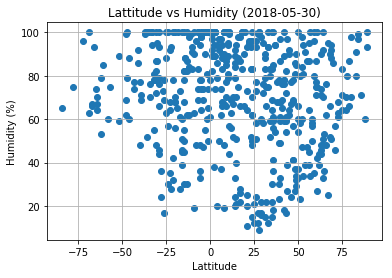

In [18]:
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title(f"Lattitude vs Humidity ({now})")
plt.scatter(cities_df["lat"],cities_df["humidity"]);
plt.grid()
plt.savefig("Output/LatVSHumidity.png")

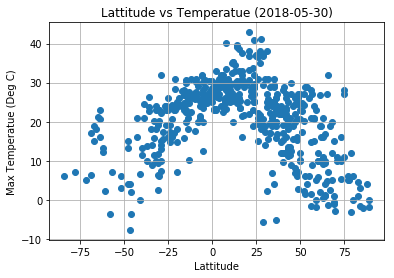

In [19]:
plt.xlabel("Lattitude")
plt.ylabel("Max Temperatue (Deg C)")
plt.title(f"Lattitude vs Temperatue ({now})")
plt.scatter(cities_df["lat"],cities_df["temp"]);
plt.grid()
plt.savefig("Output/LatVSMaxTemp.png")

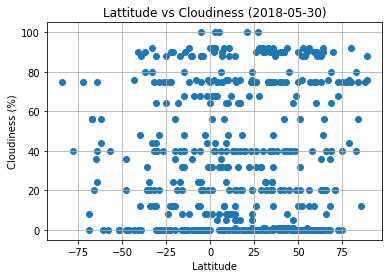

In [20]:
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Lattitude vs Cloudiness ({now})")
plt.scatter(cities_df["lat"],cities_df["cloudiness"]);
plt.grid()
plt.savefig("Output/LatVSCloudiness.png")

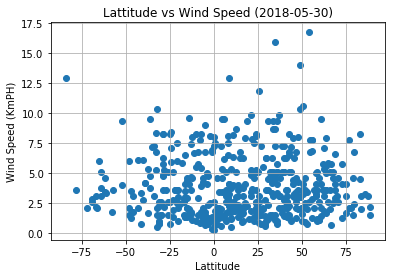

In [21]:
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (KmPH)")
plt.title(f"Lattitude vs Wind Speed ({now})")
plt.scatter(cities_df["lat"],cities_df["wind speed"]);
plt.grid()
plt.savefig("Output/LatVSWindSpeed.png")

In [16]:
# plt.xlabel("Longitude")
# plt.ylabel("Max Temperatue (Deg C)")
# plt.title(f"Longitude vs Max Temperatue ({now})")
# plt.scatter(cities_df["lng"],cities_df["temp"]);
# plt.grid()

In [17]:
# pprint(weather_data)

! pip install citipy